In [63]:
pip install wooldridge

In [97]:
import pandas as pd
import wooldridge as wd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
basedatos= pd.read_csv('/content/activity_2_ml.csv')

In [145]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, squeeze: 'bool | None' = None, prefix: 'str | lib.NoDefault' = <no_default>, mangle_dupe_cols: 'bool' = True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates=None, infer_datetime_format: 'bool' = False, keep_date_col: 'bool' = False, date_parser=None, dayfirst: 'bool' = False, cache_dates: 'bool' = True, iterator: 'bool' = False, chunksize: 'int | None' = None, compression: 'CompressionOptions' = 'infer', thousands: 'str | None' = None, decimal: 'str' = '.', lineterminator: 'str | None' = None, quotechar: 'str' = '"', quoting: 'int' = 0, doublequote: 'bool' = True, escapechar: 'str | None' = None, comment: 'str | None' = None, encoding: 'str | None' = None, encoding_errors: 'str | None' = 'strict', dialect: 'str | csv.Dialect | None' = None, error_bad_lines: 'bool | None' = None, warn_bad_lines: 'bool | None' = None, on_bad_lines=None, delim_whitespace: 'bool' = False, low_memory=True, memory_map: 'bool' = False, float_precision: "Literal['high', 'legacy'] | None" = None, storage_options: 'StorageOptions' = None) -> 'DataFrame | TextFileReader'>

In [146]:
basedatos.head()

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000.0,30000.0,75900.0,7,1836,45738.0,2
1,1981,7,22000.0,22000.0,140000.0,6,1800,44867.0,3
2,1981,31,3000.0,2000.0,68000.0,6,3304,18731.0,2
3,81,2,15000.0,17000.0,NaN,7,2744,77101.0,3
4,1981,0,10000.0,13000.0,216000.0,7,2548,46174.0,3


In [147]:
basedatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 353 non-null    int64  
 1   AGE                  353 non-null    int64  
 2   DISTANCE_BUS         353 non-null    float64
 3   DISTANCE_INTERSTATE  353 non-null    float64
 4   PRICE                283 non-null    float64
 5   ROOMS                353 non-null    int64  
 6   AREA                 353 non-null    int64  
 7   LAND                 353 non-null    float64
 8   BATHS                353 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 24.9 KB


In [148]:
basedatos['YEAR'].unique()

array([1978, 1981,   81,   78])

In [149]:
años = np.where(basedatos['YEAR'] < 100, 1900 + basedatos['YEAR'], basedatos['YEAR'])

basedatos['YEAR'] = años

In [150]:
basedatos['YEAR'].unique()

array([1978, 1981])

In [151]:
basedatos.isnull().sum()

YEAR                    0
AGE                     0
DISTANCE_BUS            0
DISTANCE_INTERSTATE     0
PRICE                  70
ROOMS                   0
AREA                    0
LAND                    0
BATHS                   0
dtype: int64

In [152]:
basedatos = basedatos.dropna()

In [153]:
basedatos.isnull().sum()

YEAR                   0
AGE                    0
DISTANCE_BUS           0
DISTANCE_INTERSTATE    0
PRICE                  0
ROOMS                  0
AREA                   0
LAND                   0
BATHS                  0
dtype: int64

In [154]:
basedatos.duplicated().sum()

21

In [155]:
basedatos.drop_duplicates(inplace=True)
basedatos.reset_index(drop=True, inplace=True)

In [156]:
basedatos.duplicated().sum()

0

In [157]:
basedatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 262 non-null    int64  
 1   AGE                  262 non-null    int64  
 2   DISTANCE_BUS         262 non-null    float64
 3   DISTANCE_INTERSTATE  262 non-null    float64
 4   PRICE                262 non-null    float64
 5   ROOMS                262 non-null    int64  
 6   AREA                 262 non-null    int64  
 7   LAND                 262 non-null    float64
 8   BATHS                262 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 18.5 KB


In [158]:
basedatos['DISTANCE_BUS'] = basedatos['DISTANCE_BUS'].astype('int64')
basedatos['DISTANCE_INTERSTATE'] = basedatos['DISTANCE_INTERSTATE'].astype('int64')
basedatos['LAND'] = basedatos['LAND'].astype('int64')
basedatos['PRICE'] = basedatos['PRICE'].astype('int64')

In [159]:
basedatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   YEAR                 262 non-null    int64
 1   AGE                  262 non-null    int64
 2   DISTANCE_BUS         262 non-null    int64
 3   DISTANCE_INTERSTATE  262 non-null    int64
 4   PRICE                262 non-null    int64
 5   ROOMS                262 non-null    int64
 6   AREA                 262 non-null    int64
 7   LAND                 262 non-null    int64
 8   BATHS                262 non-null    int64
dtypes: int64(9)
memory usage: 18.5 KB


In [160]:
basedatos.describe()

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,1979.351145,16.278626,15645.038168,16274.809160,95595.435115,6.587786,2129.774809,39456.709924,2.332061
std,1.495452,23.777437,9038.018582,9116.994728,42329.089484,0.917019,702.769022,41562.700083,0.758378
min,1978.000000,0.000000,1000.000000,1000.000000,31000.000000,4.000000,912.000000,1710.000000,1.000000
25%,1978.000000,0.000000,8000.000000,8000.000000,65000.000000,6.000000,1578.000000,15292.250000,2.000000
50%,1978.000000,4.000000,14000.000000,16000.000000,85250.000000,7.000000,2054.000000,43560.000000,2.000000
75%,1981.000000,22.750000,23000.000000,24000.000000,120000.000000,7.000000,2572.750000,45914.250000,3.000000
max,1981.000000,80.000000,35000.000000,34000.000000,300000.000000,10.000000,5136.000000,544500.000000,4.000000


In [161]:
basedatos['AGE'].unique()

array([ 1,  7, 31,  0,  8, 20, 19, 28, 68, 11, 17,  4, 10, 41,  9, 12, 21,
       25, 56, 80,  2,  3, 26, 70, 58, 78, 15, 13, 39, 23, 38, 22,  6, 48,
       51, 18,  5, 30, 14, 42, 36, 59, 71, 65, 32, 29])

In [162]:
basedatos['DISTANCE_BUS'].unique()

array([30000, 22000,  3000, 10000, 25000, 17000, 21000,  7000,  5000,
       14000, 23000, 15000,  4000, 11000, 27000, 24000,  2000, 12000,
       16000, 31000,  9000, 26000, 18000, 19000,  6000,  8000, 29000,
       20000, 13000, 32000, 28000, 33000,  1000, 35000])

In [163]:
basedatos['DISTANCE_INTERSTATE'].unique()

array([30000, 22000,  2000, 13000, 25000, 17000, 21000,  7000, 24000,
        4000,  6000, 15000, 23000, 10000, 28000, 26000, 16000, 31000,
        5000,  1000, 12000, 19000, 32000,  3000, 14000,  9000,  8000,
       18000, 20000, 11000, 29000, 33000, 34000, 27000])

In [164]:
basedatos['PRICE'].unique()

array([ 75900, 140000,  68000, 216000, 125000,  95920,  85000,  86000,
       119600,  73900,  53000,  49000,  84211, 153000,  65000, 110000,
        91000, 143500,  73000, 135900, 194000, 100000,  54000, 120000,
       130500,  61000,  71500,  40000, 189857,  32000, 113500, 109900,
        85500, 148000,  59000,  34000,  66479,  48000,  46000,  75000,
        44900,  77500,  96900,  83000, 145000,  79900, 103900, 169000,
        62500, 107900,  47000,  89912, 142000,  80000,  56900,  75500,
        90000, 121000,  53500,  94900, 160000,  96750,  64000,  70400,
        79000,  77000,  84900,  36000,  62000, 150000,  43500, 131500,
        52900, 115000,  95900, 128000,  87000,  66900,  76900, 130000,
       141000,  37500,  97000,  98000, 124500, 129900, 123000,  63900,
       118000, 167950, 135000, 117500,  61900, 204080, 106000,  97900,
       117000,  46500, 162000,  94376,  63400,  63000,  90500,  74000,
       106500,  89500,  82000,  72900, 132000,  90400, 119900, 133500,
      

In [165]:
basedatos['ROOMS'].unique()

array([ 7,  6,  8,  5,  9, 10,  4])

In [166]:
basedatos['AREA'].unique()

array([1836, 1800, 3304, 2548, 2208, 2464, 2004, 1425, 2701, 1592, 1875,
       2756, 2656, 2727, 2204, 2263, 2144, 1390, 2377, 3170, 2252, 1700,
       3030, 2330, 2106, 1928,  912, 1867, 1554, 3396, 2112, 2171, 2000,
       1855, 2632, 2544, 2736, 2458, 1144, 1104, 1038, 1261, 1537, 1780,
        960, 1998, 2952, 2574, 1182, 1570, 2569, 1540, 1910, 1978, 3292,
       3460, 1456, 2576, 3726, 3861, 1838, 1684, 2032, 1344, 1728, 1820,
       2052, 2510, 1333, 2384, 3152, 2738, 2092, 1242, 1764, 1342, 1792,
       5136, 1360, 2082, 2071, 1318, 2528, 2612, 3132, 1490, 2598, 1716,
       1199, 1848, 2450, 1920, 1750, 2644, 1080, 2920, 1464, 2346, 2136,
       3792, 3398, 2056, 2872, 1136, 1991, 2472, 1476, 2016, 1411, 2794,
       2261, 2502, 1633, 2836, 1226, 1296, 3232, 2800, 1357, 1587, 2878,
       1235, 2240, 1964, 2080, 2796, 2650, 2258, 1421, 1731, 2648, 1862,
       1482, 1388, 3055, 2238, 4056, 2780, 2744, 1232, 1148, 1842, 1560,
       1642, 2290, 1377, 3256, 3798,  990,  970, 25

In [167]:
basedatos['LAND'].unique()

array([ 45738,  44867,  18731,  46174,  48269,  44080,  19550,  48787,
        13068,  12700,   9790,  27205,  43996,  45302,  10019,  12806,
        46100,  43560,  44000,   7500,  47916,  43995,  13030,  13370,
       157252,  12005,   5000,   6790,  31412,  12500,  44064,  43569,
        50965,  64904,  26726,   9400,  15512,  15431,  10000,  48352,
         9500,  51690, 147668,  41463,  44247,   8790,  20909,  35121,
        11421,  18215,  12568,  43935,  35284,  51062,   9249,  81273,
        10993,  78408,  31915,  11883,  51835,  47045,  23087,  86249,
         8500,  43561,  45106,  43910,  43958,   9665,  20550,  44431,
         8370,  26136,  45500,  54450,  46300,  50808,  44260,  12516,
        52272,  29129,  35942,  63260,  65340, 104544,  12632,  52708,
        34879,  15664,  44900,  15246,  45465,  34666,  17728,  46609,
        37046,  32255,  94961,  25380,  69260,  54014,   5957,  95832,
        25182,  25000,  43757,  21120,  14810,  53000,  25265,  25690,
      

In [168]:
basedatos['BATHS'].unique()

array([2, 3, 1, 4])

In [169]:
basedatos

,YEAR,AGE,DISTANCE_BUS,DISTANCE_INTERSTATE,PRICE,ROOMS,AREA,LAND,BATHS
0,1978,1,30000,30000,75900,7,1836,45738,2
1,1981,7,22000,22000,140000,6,1800,44867,3
2,1981,31,3000,2000,68000,6,3304,18731,2
3,1981,0,10000,13000,216000,7,2548,46174,3
4,1981,0,25000,25000,125000,7,2208,45738,3
...,...,...,...,...,...,...,...,...,...
257,1981,2,20000,20000,158000,7,2627,43560,3
258,1981,51,2000,5000,50000,5,1140,13945,1
259,1981,1,22000,24000,162000,7,2656,45302,3
260,1978,3,12000,12000,64900,7,2856,29955,2


In [170]:
datos_agrupados = basedatos.groupby('YEAR')

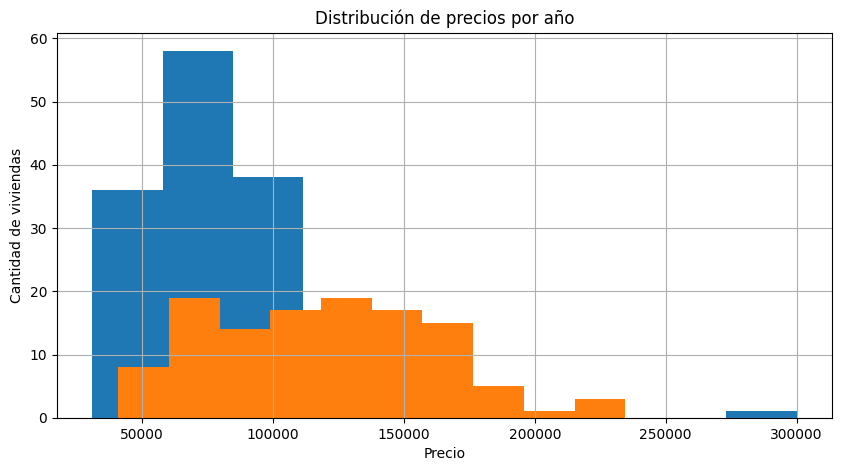

In [171]:
datos_agrupados['PRICE'].hist(figsize=(10, 5))
plt.title('Distribución de precios por año')
plt.xlabel('Precio')
plt.ylabel('Cantidad de viviendas')
plt.show()

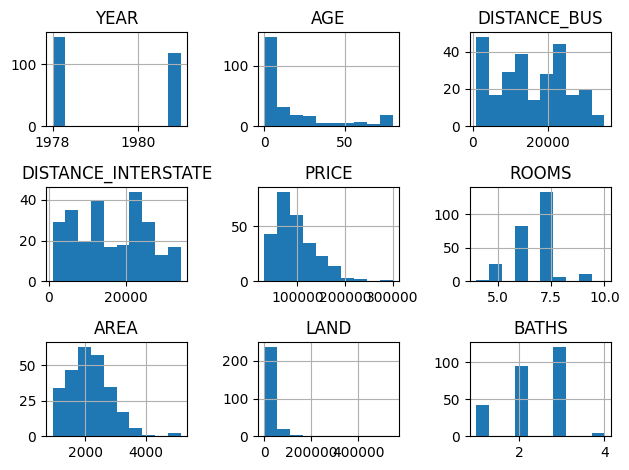

In [177]:
basedatos.hist()
plt.tight_layout()

<Axes: xlabel='BATHS', ylabel='Count'>

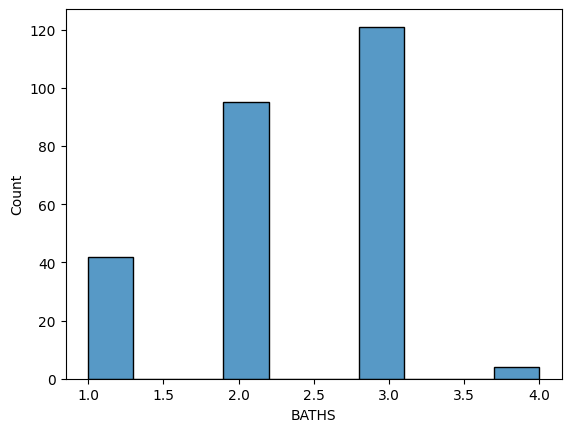

In [206]:
sns.histplot(x=basedatos['BATHS'])

<Axes: xlabel='YEAR', ylabel='Count'>

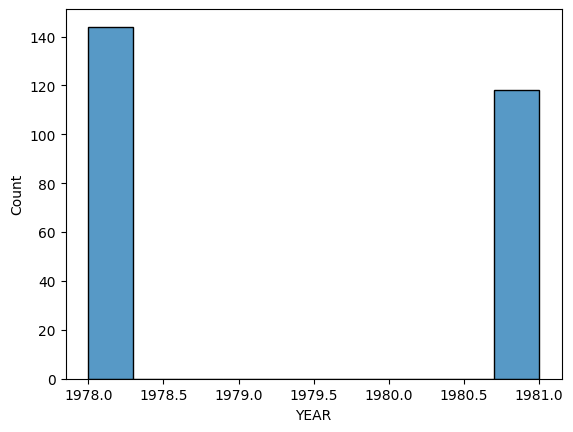

In [208]:
sns.histplot(x=basedatos['YEAR'])

<Axes: xlabel='ROOMS', ylabel='Count'>

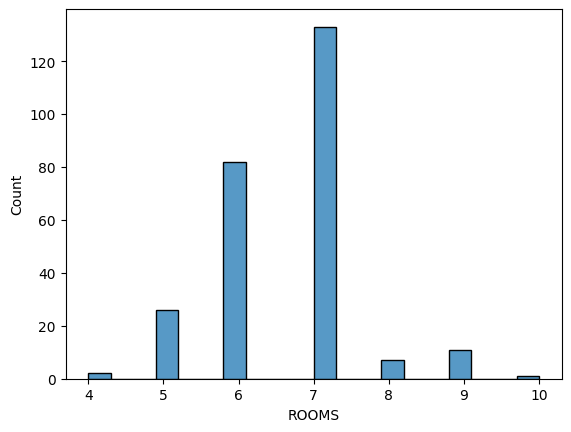

In [207]:
sns.histplot(x=basedatos['ROOMS'])

<Axes: ylabel='BATHS'>

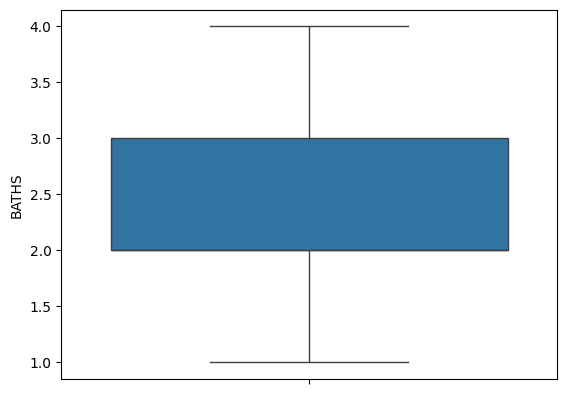

In [204]:
sns.boxplot(data=basedatos, y='BATHS')

<Axes: ylabel='ROOMS'>

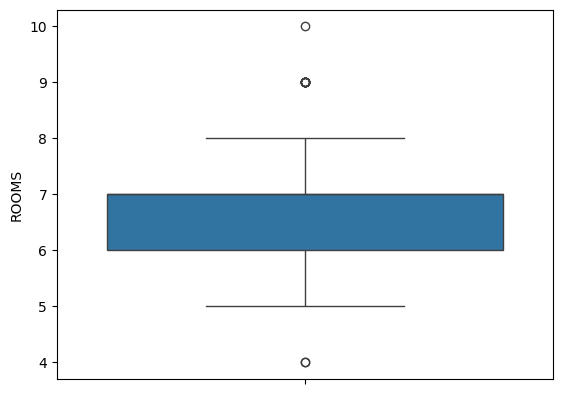

In [205]:
sns.boxplot(data=basedatos, y='ROOMS')

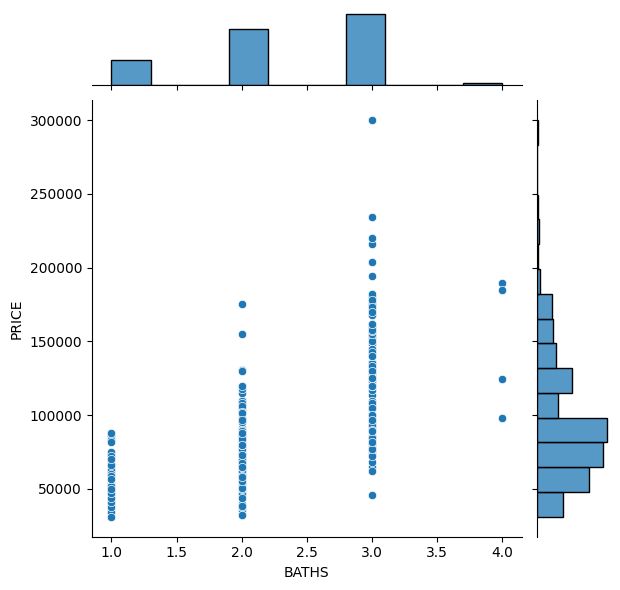

In [210]:
sns.jointplot(y=basedatos['PRICE'],x=basedatos['BATHS'])

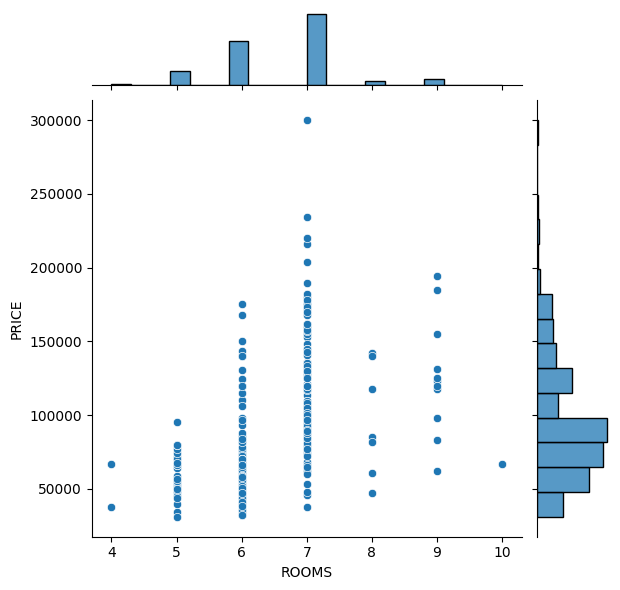

In [211]:
sns.jointplot(y=basedatos['PRICE'],x=basedatos['ROOMS'])